In [4]:
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

data = pd.read_csv('manual_30min_norm.csv')

# Преобразование столбца 'TIME' в формат datetime
data['TIME'] = pd.to_datetime(data['TIME'])

# Преобразование столбца 'TIME' в числовой формат (unix timestamp)
data['TIME'] = (data['TIME'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
data.head()

C:\Users\nickross\AppData\Local\Temp\ipykernel_16668\1438329693.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['TIME'] = pd.to_datetime(data['TIME'])


,TIME,FM1,PE1,PE2,PE3,PE4,TP1,EPOCH
0,1379289600,1.000000,0.538462,0.538462,0.123077,0.123077,0.142857,1379289600
1,1379291400,0.999475,0.538416,0.538416,0.123077,0.122985,0.143787,1379291400
2,1379293200,0.998950,0.538370,0.538370,0.123077,0.122894,0.144717,1379293200
3,1379295000,0.998424,0.538324,0.538324,0.123077,0.122802,0.145647,1379295000
4,1379296800,0.997899,0.538278,0.538278,0.123077,0.122711,0.146577,1379296800


In [5]:
# Предобработка данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

train_length = int(len(scaled_data) * 0.7)

X = scaled_data[:, 1:]
y = scaled_data[:, 0]

# Разделение данных на обучающую и тестовую выборки
train_X = X[0:train_length]
train_y = y[0:train_length]
test_X = X[train_length:]
test_y = y[train_length:]

# Создание модели LSTM
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Обучение модели
model.fit(train_X, train_y, epochs=20, batch_size=1, verbose=2)

# Предсказание
predictions = model.predict(test_X)



Epoch 1/20

77448/77448 - 181s - loss: 1.8151e-04 - 181s/epoch - 2ms/step
Epoch 2/20
77448/77448 - 178s - loss: 3.8510e-06 - 178s/epoch - 2ms/step
Epoch 3/20
77448/77448 - 179s - loss: 2.4966e-06 - 179s/epoch - 2ms/step
Epoch 4/20
77448/77448 - 179s - loss: 1.7638e-06 - 179s/epoch - 2ms/step
Epoch 5/20
77448/77448 - 177s - loss: 1.4498e-06 - 177s/epoch - 2ms/step
Epoch 6/20
77448/77448 - 180s - loss: 1.3070e-06 - 180s/epoch - 2ms/step
Epoch 7/20
77448/77448 - 179s - loss: 1.1307e-06 - 179s/epoch - 2ms/step
Epoch 8/20
77448/77448 - 178s - loss: 1.0985e-06 - 178s/epoch - 2ms/step
Epoch 9/20
77448/77448 - 179s - loss: 9.9058e-07 - 179s/epoch - 2ms/step
Epoch 10/20
77448/77448 - 179s - loss: 9.5143e-07 - 179s/epoch - 2ms/step
Epoch 11/20
77448/77448 - 179s - loss: 9.0795e-07 - 179s/epoch - 2ms/step
Epoch 12/20
77448/77448 - 179s - loss: 8.4723e-07 - 179s/epoch - 2ms/step
Epoch 13/20
77448/77448 - 180s - loss: 8.2484e-07 - 180s/epoch - 2ms/step
Epoch 14/20
77448/77448 - 179s - loss: 7.817

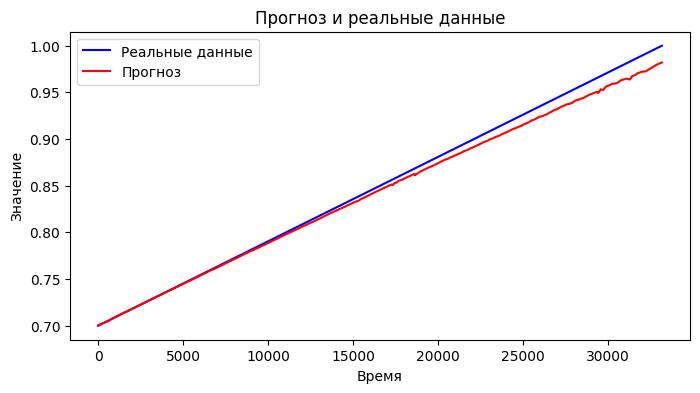

In [6]:
# Визуализация результатов
plt.figure(figsize=(8,4))
plt.plot(test_y, color='blue', label='Реальные данные')
plt.plot(predictions, color='red', label='Прогноз')
plt.title('Прогноз и реальные данные')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()